# RANGGA SASMITA PADMANAGARA
# 51421257
# KELAS A
# PERTEMUAN 5

#Business Understanding
Airbnb adalah platform akomodasi yang sesuai dengan kebutuhan menginap dan meminjamkan.
Sumber pendapatan utama mereka adalah biaya untuk tuan rumah. Pada dasarnya, ketika jumlah transaksi antara tuan rumah dan tamu meningkat, keuntungan mereka juga meningkat.
Jadi, ini penting untuk bisnis mereka dan saya berharap ini menjadi salah satu KPI mereka

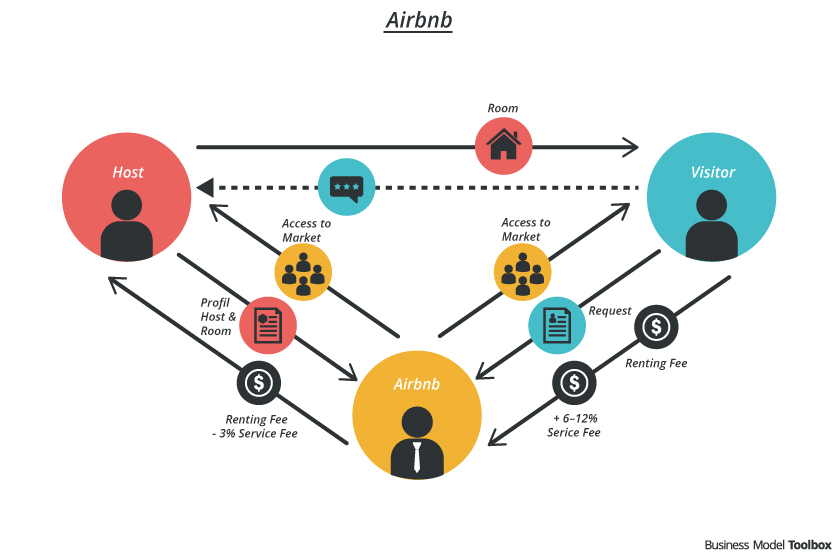

#Data Understanding

Kami memiliki tiga data.

- daftar: termasuk deskripsi lengkap dan skor ulasan rata-rata
- kalender: termasuk id listing dan harga serta ketersediaan untuk hari itu
- ulasan: termasuk id unik untuk setiap pengulas dan komentar rinci

Pada bagian ini, saya akan membuat beberapa visualisasi dan agregasi untuk memahami karakteristik data.

In [2]:
import pandas as pd

In [8]:
# load data
seattle_calendar = pd.read_csv('calendar.csv')
seattle_listing = pd.read_csv('listings.csv')
seattle_review = pd.read_csv('reviews.csv')

Kalender

In [9]:
seattle_calendar.head()


,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [10]:
seattle_calendar.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1393570 non-null  int64 
 1   date        1393570 non-null  object
 2   available   1393570 non-null  object
 3   price       934542 non-null   object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB


Ada 4 kolom.
Di sini, saya menemukan beberapa karakteristik data.

Tidak hanya hari yang tersedia yang disimpan dalam data, tampaknya tidak ada hari yang tidak tersedia.
Jika nilai yang tersedia adalah f, nilai harga tampaknya menjadi NaN.
Nilai harga disimpan sebagai objek, bukan bilangan bulat. Hal ini disebabkan nilai yang disimpan seperti $xx.xx, dan perlu untuk mengubah kolom ini.
Menanggapi hasil tersebut, sekarang saya memiliki dua pertanyaan.

Jika nilai yang tersedia adalah f, maka nilai harga yang muncul adalah NaN. Tapi itu hanya hipotesis, apakah benar semua data?
Berapa banyak baris untuk setiap listing_id?
Mari kita jawab pertanyaan-pertanyaan ini dengan mengeksplorasi data.

In [11]:
#  If the available values are f, the price values seems to be NaN. But it is only a hypothesis, is it true all data?
calendar_q1_df = seattle_calendar.groupby('available')['price'].count().reset_index()
calendar_q1_df.columns = ['available', 'price_nonnull_count']
calendar_q1_df

,available,price_nonnull_count
0,f,0
1,t,934542


In [12]:
#  How many rows per each listing_id?
calendar_q2_df = seattle_calendar.groupby('listing_id')['date'].count().reset_index()
calendar_q2_df['date'].value_counts()

,count
date,
365,3818


Di atas, saya bisa menjawab pertanyaan saya. Jawabannya adalah

Jika nilai yang tersedia adalah f, maka nilai harga tampaknya adalah NaN. Tapi itu hanya hipotesis, apakah benar semua data?
-> benar !!

Berapa banyak baris per setiap listing_id?
-> catatan 365 hari. Ini sama dengan satu tahun.

Sekarang, saya hampir mengerti fitur dari data tersebut.
Akhirnya, saya akan meneliti apakah ada tren harga listing.

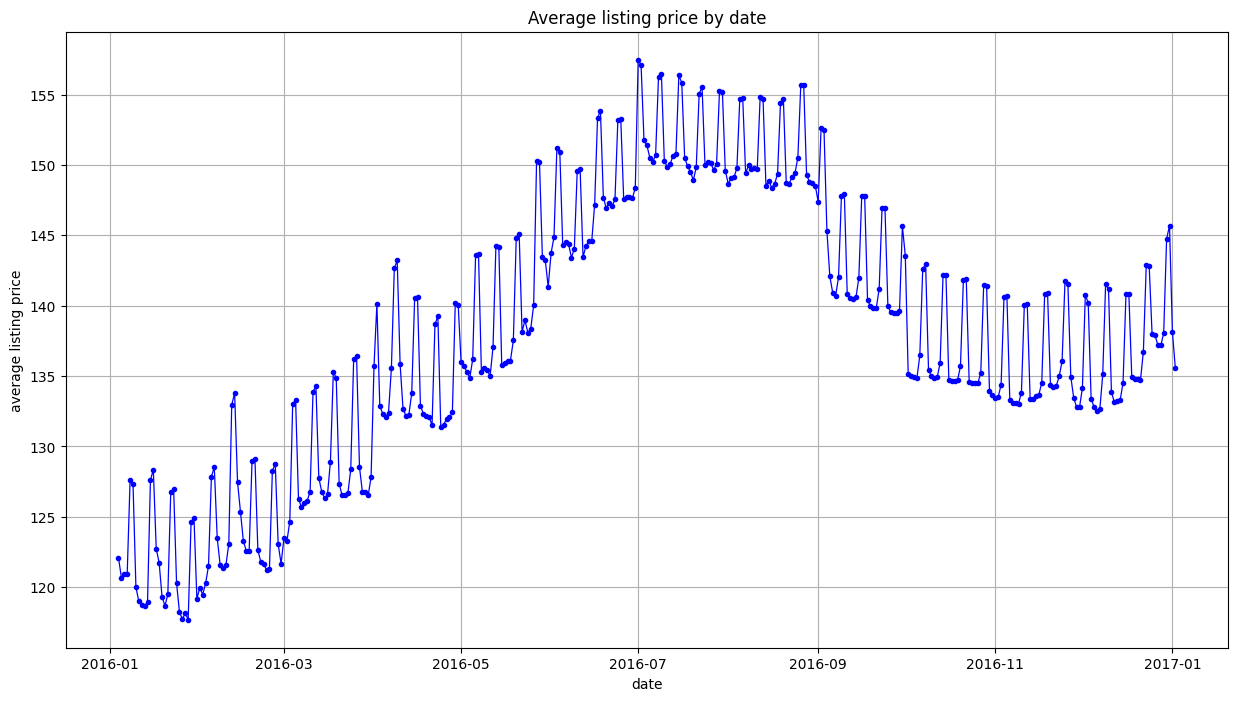

In [15]:
# process data
calendar_q3_df = seattle_calendar.copy(deep=True)
calendar_q3_df.dropna(inplace=True)
calendar_q3_df['date'] = pd.to_datetime(calendar_q3_df['date'])
calendar_q3_df['price'] = calendar_q3_df['price'].map(lambda x: float(x[1:].replace(",", "")))

# apply aggregation
calendar_q3_df = calendar_q3_df.groupby('date')['price'].mean().reset_index()

# import matplotlib
import matplotlib.pyplot as plt

# plot avg listings prices over time.
plt.figure(figsize=(15, 8))
plt.plot(calendar_q3_df.date, calendar_q3_df.price, color='b', marker='.', linewidth=0.9)
plt.title("Average listing price by date")
plt.xlabel('date')
plt.ylabel('average listing price')
plt.grid()

Ada dua tren dari data tersebut.

Rata-rata kenaikan harga dari 2016/1 ke 2016/7, dan mencapai puncaknya selama tiga bulan, dan semakin rendah. Dan rata-rata proses 2017/1 lebih tinggi dari 1 tahun yang lalu.
Ada puncak kecil secara berkala.
Tren pertama dapat dibagi menjadi dua faktor. Pertama adalah faktor musiman, dan yang kedua adalah faktor keseluruhan.
Tren kedua terlihat seperti tren mingguan, jadi mari kita lihat lebih dekat !!

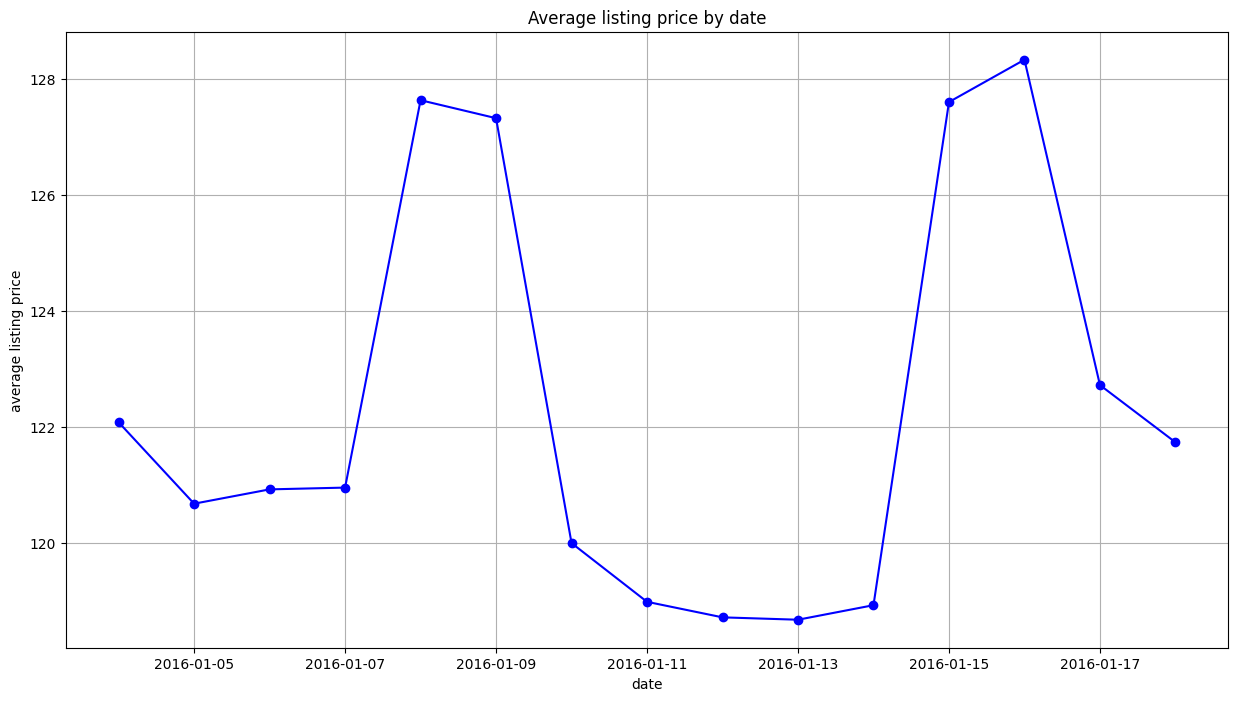

In [16]:
# plot more narrow range
plt.figure(figsize=(15, 8))
plt.plot(calendar_q3_df.date.values[:15], calendar_q3_df.price.values[:15], color='b', marker='o', linewidth=1.5)
plt.title("Average listing price by date")
plt.xlabel('date')
plt.ylabel('average listing price')
plt.grid()

<ipython-input-24-c49eb5c570e8>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'weekday',  y = 'price', data = calendar_q3_df, palette="Blues", width=0.6)


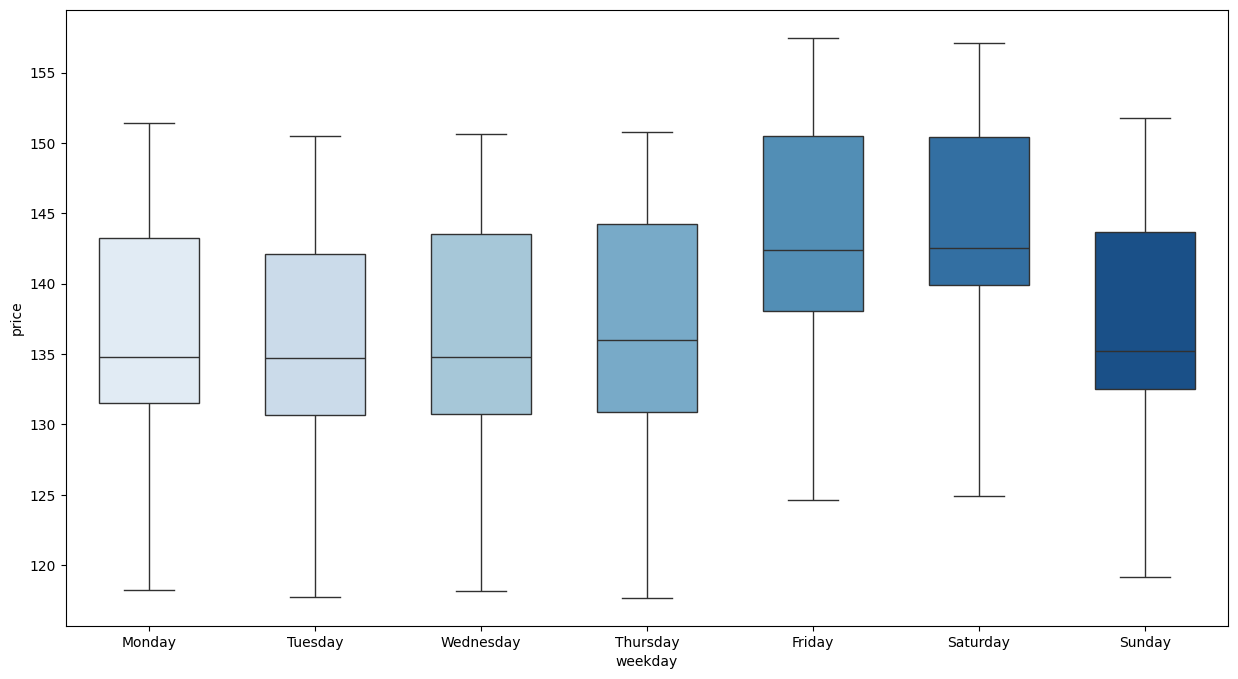

In [24]:
# import seaborn
!pip install seaborn
import seaborn as sns

# create weekday column
calendar_q3_df["weekday"] = calendar_q3_df["date"].dt.day_name()

# boxplot to see price distribution
plt.figure(figsize=(15, 8))
sns.boxplot(x = 'weekday',  y = 'price', data = calendar_q3_df, palette="Blues", width=0.6)
plt.show()

Akhir pekan, Jumat dan Sabtu memiliki harga yang tinggi.

Ringkasan
Setiap daftar memiliki catatan 365 hari dalam data ini.
Jika nilai yang tersedia adalah f, maka nilai harga adalah NaN.
Terdapat tren mingguan dimana harga listing di akhir pekan lebih tinggi daripada hari kerja lainnya.

listings

In [25]:
seattle_listing.head()


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [26]:
print(list(seattle_listing.columns.values))


['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary', 'space', 'description', 'experiences_offered', 'neighborhood_overview', 'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since', 'host_location', 'host_about', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_listings_count', 'host_total_listings_count', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'street', 'neighbourhood', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market', 'smart_location', 'country_code', 'country', 'latitude', 'longitude', 'is_location_exact', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'square_feet', 'price', 'weekly_price', 'monthly_price', 'security_deposit', 'cleaning_fee', 'gues

Ada banyak kolom, jadi saya tidak bisa menjelajahi setiap kolom di sini.
Di sini saya akan melihat beberapa kolom yang saya minati.

Pertama, saya akan menyelidiki berapa banyak daftar yang ada di dalam data.

In [27]:
print("Num of listings: ", seattle_listing.id.count())
print("Num of rows: ", seattle_listing.shape[0])

Num of listings:  3818
Num of rows:  3818


Hal ini menunjukkan bahwa setiap baris mewakili daftar yang unik.

Selanjutnya, saya tertarik dengan kolom-kolom di bawah ini.

skor_penilaian_rating
harga
maksimum_malam
Bagaimana distribusi nilai-nilai ini di setiap kolom? Apakah distribusinya miring atau normal?
Mari kita lihat!

review_scores_rating

In [28]:
seattle_listing['review_scores_rating'].describe().reset_index()

,index,review_scores_rating
0,count,3171.000000
1,mean,94.539262
2,std,6.606083
3,min,20.000000
4,25%,93.000000
5,50%,96.000000
6,75%,99.000000
7,max,100.000000


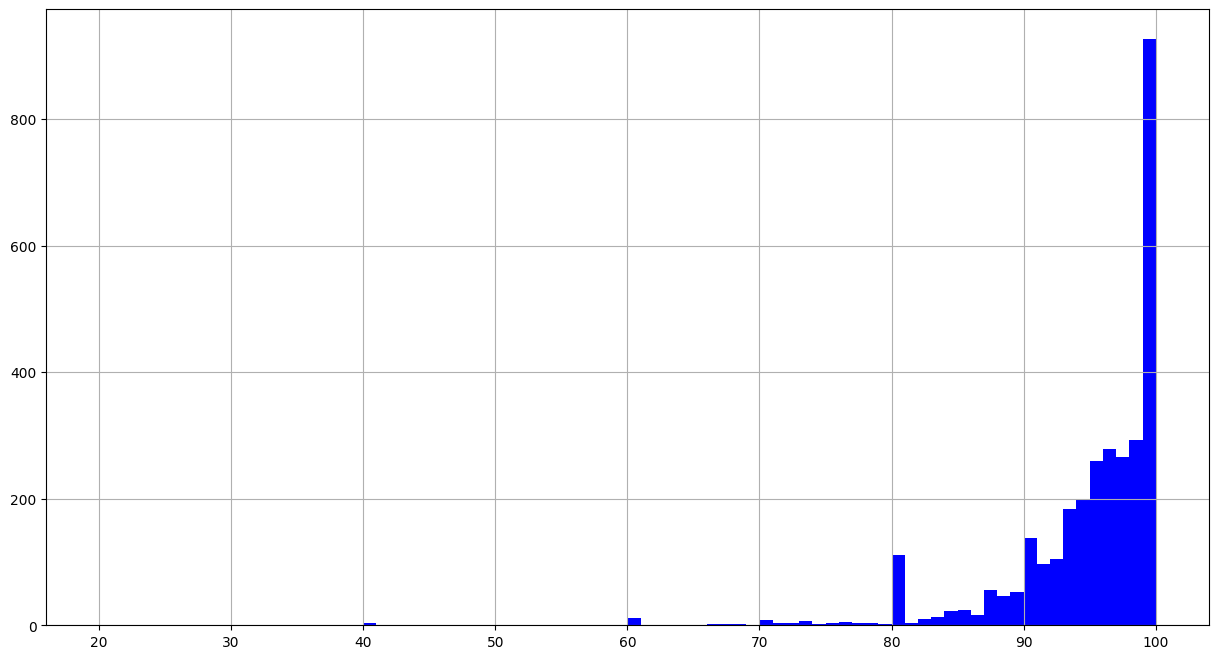

In [29]:
# cleaning data
listings_q1_df = seattle_listing['review_scores_rating'].dropna()

# plot histgram
plt.figure(figsize=(15, 8))
plt.hist(listings_q1_df.values, bins=80, color='b')
plt.grid()

Ini adalah distribusi yang sangat condong ke kanan.
Nilai 75% atau lebih adalah 90 poin. Dan yang paling umum adalah 100 poin.
Saya dapat mengatakan daftar nilai yang rendah adalah minoritas.

Harga

In [30]:
# cleaning data
listings_q2_df = seattle_listing.copy(deep=True)
listings_q2_df = listings_q2_df['price'].dropna().reset_index()
listings_q2_df['price'] = listings_q2_df['price'].map(lambda x: float(x[1:].replace(',', '')))

listings_q2_df['price'].describe().reset_index()

,index,price
0,count,3818.000000
1,mean,127.976166
2,std,90.250022
3,min,20.000000
4,25%,75.000000
5,50%,100.000000
6,75%,150.000000
7,max,1000.000000


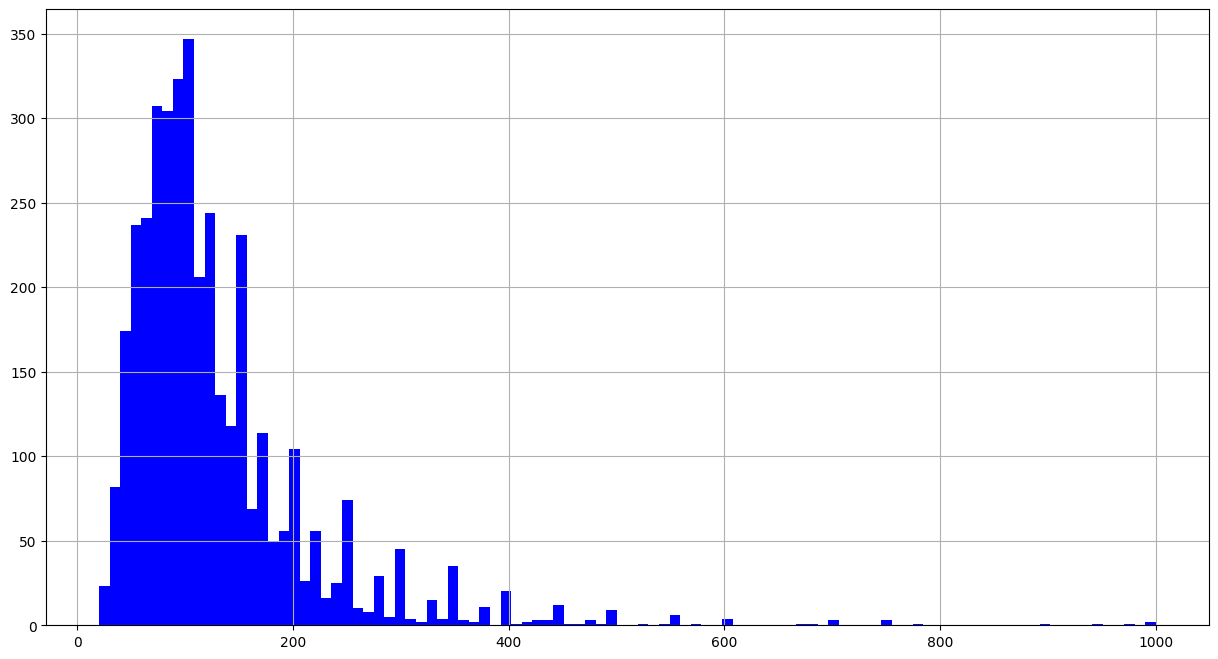

In [31]:
plt.figure(figsize=(15, 8))
plt.hist(listings_q2_df.price, bins=100, color='b')
plt.grid()

Ini adalah distribusi ekor yang panjang.
Hampir semua nilai berkisar antara 0 hingga 200.

maximum_nights

In [32]:
seattle_listing['maximum_nights'].describe().reset_index()


,index,maximum_nights
0,count,3818.000000
1,mean,780.447617
2,std,1683.589007
3,min,1.000000
4,25%,60.000000
5,50%,1125.000000
6,75%,1125.000000
7,max,100000.000000


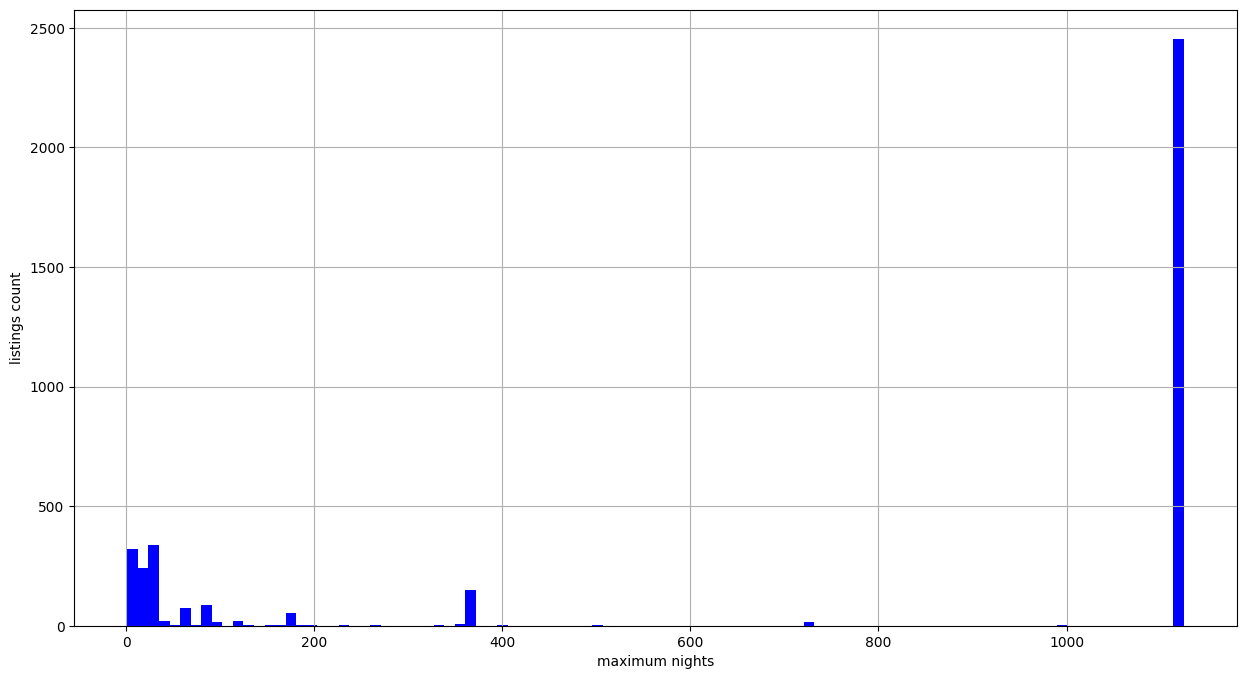

In [33]:
# eliminate outliers because maximum values are very large.
listings_q3_df = seattle_listing[seattle_listing['maximum_nights'] <= 1500]

plt.figure(figsize=(15, 8))
plt.hist(listings_q3_df.maximum_nights, bins=100, color='b')
plt.xlabel('maximum nights')
plt.ylabel('listings count')
plt.grid()

Hal ini sangat mengejutkan karena saya memperkirakan paling lama seminggu.
Bahkan, hampir semua nilai maxmum_night ditetapkan 1125.
Saya belum pernah menggunakan Airbnb jadi saya tidak tahu, tapi mungkin ada sesuatu seperti nilai default.
Atau mungkin ada dua segmen, satu adalah daftar tempat yang tersedia, yang lainnya adalah daftar jangka panjang seperti sewa normal.

Ringkasan
- listings memiliki 92 kolom.
- review_scores_rating memiliki distribusi miring ke kanan, dan hampir semua nilainya lebih dari 90 poin.
- Harga memiliki distribusi ekor yang panjang, hampir semua nilainya sekitar $ 100 tetapi beberapa nilai jauh lebih tinggi dari nilai lainnya.
- Maximum_nights memiliki distribusi yang sangat istimewa. Ada dua segmen, satu sekitar 3 tahun, yang lainnya sekitar 1 minggu.


Review

In [34]:
seattle_review.head()


,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


In [35]:
seattle_review.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84849 entries, 0 to 84848
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   listing_id     84849 non-null  int64 
 1   id             84849 non-null  int64 
 2   date           84849 non-null  object
 3   reviewer_id    84849 non-null  int64 
 4   reviewer_name  84849 non-null  object
 5   comments       84831 non-null  object
dtypes: int64(3), object(3)
memory usage: 3.9+ MB


In [36]:
print("sample 1: ", seattle_review.comments.values[0], "\n")
print("sample 2: ", seattle_review.comments.values[3])

sample 1:  Cute and cozy place. Perfect location to everything!  

sample 2:  Close to Seattle Center and all it has to offer - ballet, theater, museum, Space Needle, restaurants of all ilk just blocks away, and the Metropolitan (probably the coolest grocer you'll ever find). Easy to find and Kelly was warm, welcoming, and really interesting to talk to. 


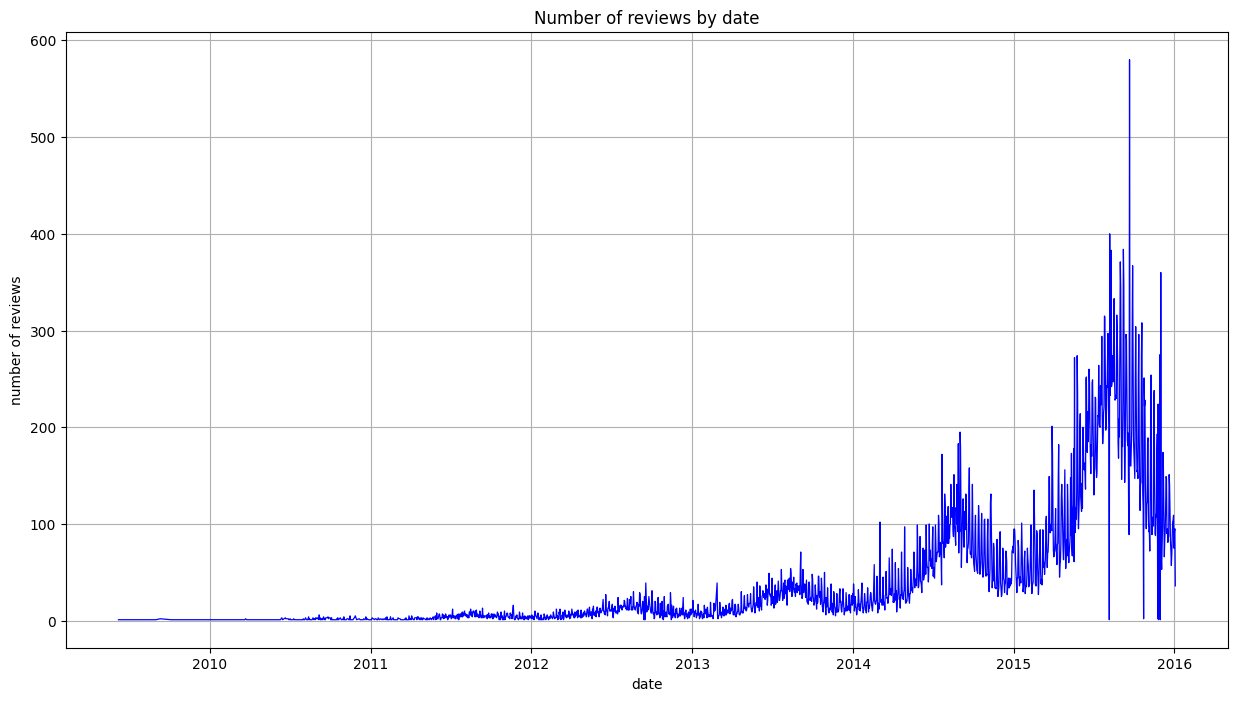

In [37]:
# convert date column's data type to date from object
review_q1_df = seattle_review.copy(deep=True)
review_q1_df.date = pd.to_datetime(review_q1_df.date)

review_q1_df = review_q1_df.groupby('date')['id'].count().reset_index()

# plot avg listings prices over time.
plt.figure(figsize=(15, 8))
plt.plot(review_q1_df.date, review_q1_df.id, color='b', linewidth=0.9)
plt.title("Number of reviews by date")
plt.xlabel('date')
plt.ylabel('number of reviews')
plt.grid()

Memang sedikit berisik, tapi kita bisa melihat peningkatan jumlah pengguna Airbnb. (dan rentang tanggalnya lebih lebar dari data kalender)
Dan saya menyadari bahwa grafik ini tampaknya memiliki puncaknya pada waktu yang hampir sama setiap tahunnya.
Jadi, mari kita gunakan rata-rata bergerak untuk memperhalus grafiknya.

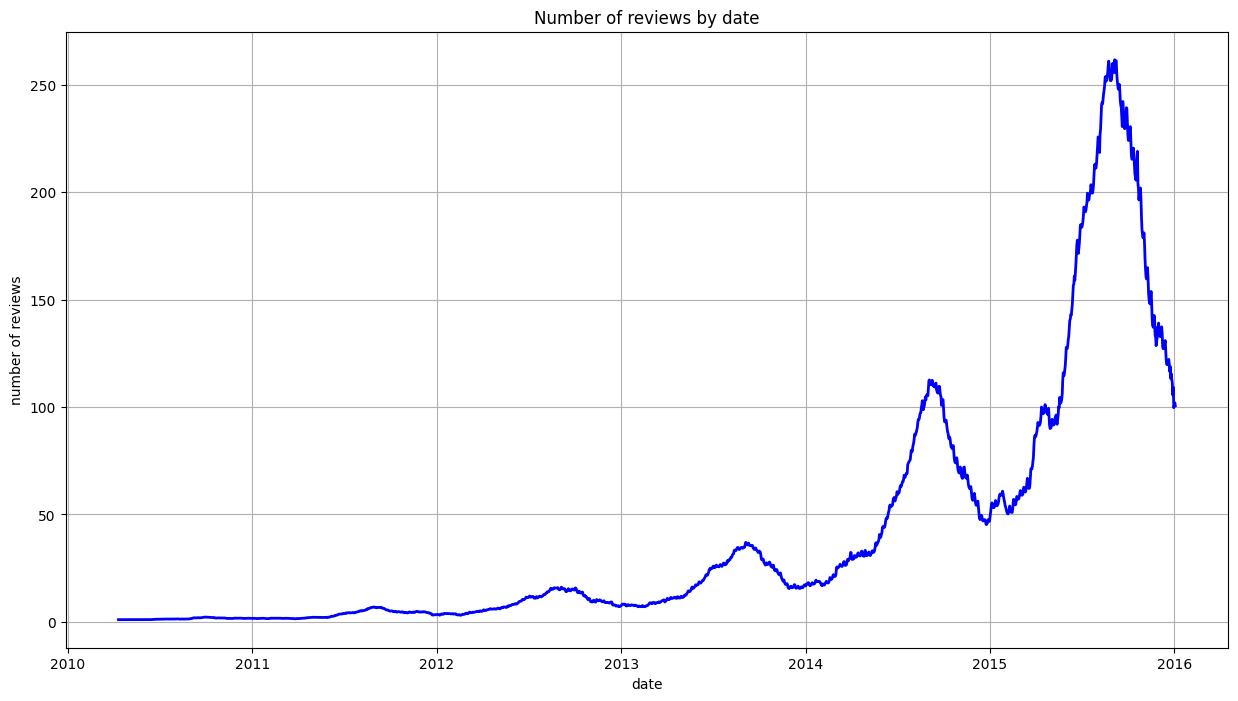

In [38]:
# create rolling mean column
review_q1_df["rolling_mean_30"] = review_q1_df.id.rolling(window=30).mean()

# plot avg listings prices over time.
plt.figure(figsize=(15, 8))
plt.plot(review_q1_df.date, review_q1_df.rolling_mean_30, color='b', linewidth=2.0)
plt.title("Number of reviews by date")
plt.xlabel('date')
plt.ylabel('number of reviews')
plt.grid()

Saya mencoba jendela tiga puluh hari (sekitar 1 bulan).
Grafik menjadi halus dan trennya menjadi jelas, dan keyakinan saya bahwa puncaknya berada di tempat yang sama menjadi lebih kuat.
Selanjutnya, saya mengekstrak kapan puncaknya terjadi setiap tahun.

In [41]:
import numpy as np # import the numpy module

review_q1_df["year"] = review_q1_df.date.dt.year
years = review_q1_df.year.unique()

for year in years:
    if year >= 2010 and year < 2016:
        year_df = review_q1_df[review_q1_df.year == year]
        max_value = year_df.rolling_mean_30.max()
        max_date = year_df[year_df.rolling_mean_30 == max_value].date.dt.date.values[0]
        print(year, max_date, np.round(max_value, 1)) # use np to reference the numpy module

2010 2010-10-04 2.3
2011 2011-08-31 7.0
2012 2012-09-04 16.2
2013 2013-09-04 37.0
2014 2014-09-03 112.6
2015 2015-09-05 261.6


Puncaknya tampaknya terjadi pada awal bulan September!! Apakah ini liburan musim panas?

<ipython-input-42-51f629e57169>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  listings_q3_df["min_max_night_diff"] = listings_q3_df.maximum_nights - listings_q3_df.minimum_nights


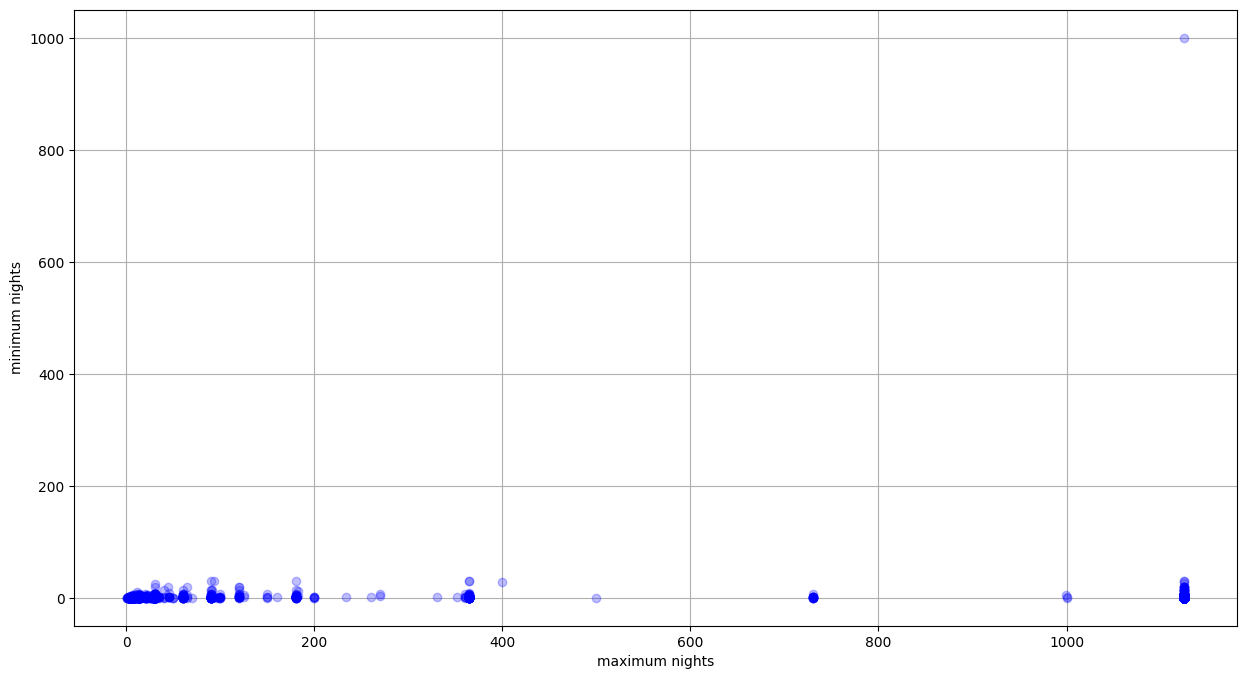

In [42]:
listings_q3_df["min_max_night_diff"] = listings_q3_df.maximum_nights - listings_q3_df.minimum_nights

plt.figure(figsize=(15, 8))
plt.plot(listings_q3_df.maximum_nights, listings_q3_df.minimum_nights, color='b', marker='o', linewidth=0, alpha=0.25)
plt.xlabel('maximum nights')
plt.ylabel('minimum nights')
plt.grid()

Dari sini, dapat dilihat bahwa jumlah malam minimum hampir konstan terlepas dari jumlah malam maksimum. Dengan kata lain, dapat dilihat bahwa daftar dengan malam maksimum yang panjang tidak disewa secara eksklusif untuk disewakan, tetapi secara luas ditangani mulai dari penggunaan sesaat hingga masa inap jangka panjang.

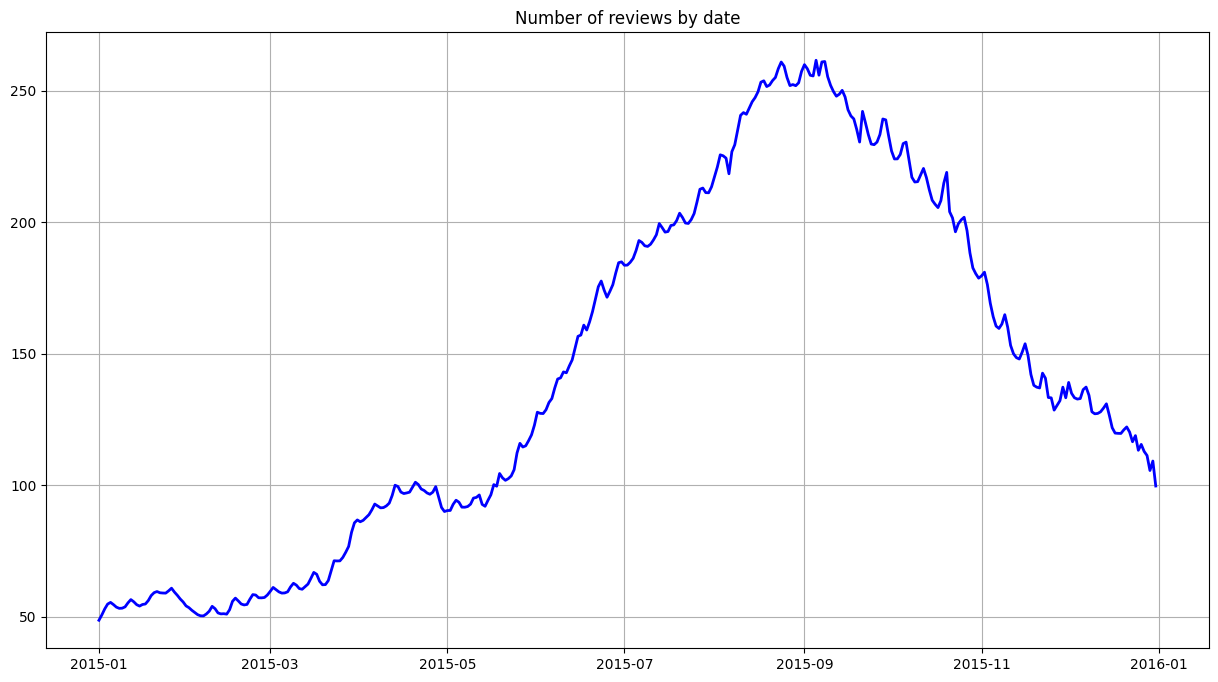

In [43]:
review_q2_df = review_q1_df[review_q1_df.year == 2015]

plt.figure(figsize=(15, 8))
plt.plot(review_q2_df.date, review_q2_df.rolling_mean_30, color='b', linewidth=2.0)
plt.title("Number of reviews by date")
plt.grid()

#Data Preparation¶
Dari sini, saya ingin menjawab pertanyaan terakhir, “Apakah ada tren kamar yang populer?”.
Jadi, Mari kita mulai membersihkan dan memproses data listing.

Pertama, kita perlu mendefinisikan variabel target 'Popularitas listing'. Saya pikir ini dapat didefinisikan sebagai berikut.

[Jumlah aktual sewa] / ([Hari yang tersedia dari 2016 hingga 2017] * (2017 - [Tahun daftar dibuka]))

Karena jumlah berapa kali listing disewakan dianggap sebanding dengan jumlah hari properti tersedia, maka perlu diskalakan, dan lebih jauh lagi, karena jumlah tersebut dianggap meningkat semakin cepat listing dirilis ke publik, kita perlu menskalakannya juga.

Satu hal yang tidak dapat saya pertimbangkan di sini adalah periode ketika listing tersebut benar-benar disewa. Semakin lama periode penyewaan, semakin kecil jumlah penyewaan. Namun, tidak ada data untuk mempertimbangkan hal ini, jadi saya akan mengasumsikan bahwa sebagian besar pengguna Airbnb adalah pengguna jangka pendek.

Pertama, kita mulai dengan memeriksa nilai nol. Ini karena kita tidak dapat menggunakan kolom yang memiliki nilai nol.

In [44]:
prepare_df = seattle_listing.copy(deep=True)


In [45]:
# check null count
df_length = prepare_df.shape[0]

for col in prepare_df.columns:
    null_count = prepare_df[col].isnull().sum()
    if null_count == 0:
        continue

    null_ratio = np.round(null_count/df_length * 100, 2)
    print("{} has {} null values ({}%)".format(col, null_count, null_ratio))

summary has 177 null values (4.64%)
space has 569 null values (14.9%)
neighborhood_overview has 1032 null values (27.03%)
notes has 1606 null values (42.06%)
transit has 934 null values (24.46%)
thumbnail_url has 320 null values (8.38%)
medium_url has 320 null values (8.38%)
xl_picture_url has 320 null values (8.38%)
host_name has 2 null values (0.05%)
host_since has 2 null values (0.05%)
host_location has 8 null values (0.21%)
host_about has 859 null values (22.5%)
host_response_time has 523 null values (13.7%)
host_response_rate has 523 null values (13.7%)
host_acceptance_rate has 773 null values (20.25%)
host_is_superhost has 2 null values (0.05%)
host_thumbnail_url has 2 null values (0.05%)
host_picture_url has 2 null values (0.05%)
host_neighbourhood has 300 null values (7.86%)
host_listings_count has 2 null values (0.05%)
host_total_listings_count has 2 null values (0.05%)
host_verifications has 2 null values (0.05%)
host_has_profile_pic has 2 null values (0.05%)
host_identity_ve

Seperti yang Anda lihat, tampaknya ada kolom yang 90% atau lebih nilainya nol, tetapi sebagian besar kolom memiliki antara 0-30% null_ratio. Oleh karena itu, di sini, saya memutuskan untuk mengecualikan dari analisis kolom dengan rasio null 30% atau lebih.

Selain itu, tampaknya hanya ada dua nilai null di host_since yang digunakan untuk menghitung variabel target. Hal ini perlu dihapus.

In [46]:
# detect need drop columns
drop_cols = [col for col in prepare_df.columns if prepare_df[col].isnull().sum()/df_length >= 0.3]

# drop null
prepare_df.drop(drop_cols, axis=1, inplace=True)
prepare_df.dropna(subset=['host_since'], inplace=True)

# check after
for col in prepare_df.columns:
    null_count = prepare_df[col].isnull().sum()
    if null_count == 0:
        continue

    null_ratio = np.round(null_count/df_length * 100, 2)
    print("{} has {} null values ({}%)".format(col, null_count, null_ratio))

summary has 177 null values (4.64%)
space has 568 null values (14.88%)
neighborhood_overview has 1031 null values (27.0%)
transit has 933 null values (24.44%)
thumbnail_url has 320 null values (8.38%)
medium_url has 320 null values (8.38%)
xl_picture_url has 320 null values (8.38%)
host_location has 6 null values (0.16%)
host_about has 857 null values (22.45%)
host_response_time has 521 null values (13.65%)
host_response_rate has 521 null values (13.65%)
host_acceptance_rate has 771 null values (20.19%)
host_neighbourhood has 298 null values (7.81%)
neighbourhood has 416 null values (10.9%)
zipcode has 7 null values (0.18%)
property_type has 1 null values (0.03%)
bathrooms has 16 null values (0.42%)
bedrooms has 6 null values (0.16%)
beds has 1 null values (0.03%)
cleaning_fee has 1029 null values (26.95%)
first_review has 625 null values (16.37%)
last_review has 625 null values (16.37%)
review_scores_rating has 645 null values (16.89%)
review_scores_accuracy has 656 null values (17.18

Selanjutnya, kita akan menghapus kolom yang tampaknya bukan merupakan fitur kemudahan peminjaman. Karena kita tidak menyertakan pemrosesan bahasa alami kali ini, kita juga akan menghapus kolom berbasis komentar.

In [47]:
drop_cols = ['listing_url', 'scrape_id', 'last_scraped', 'name', 'summary', 'space', 'description', 'neighborhood_overview',
                'transit', 'medium_url', 'picture_url', 'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_about', 'host_thumbnail_url',
                'host_picture_url', 'street', 'city', 'state', 'zipcode', 'market', 'smart_location', 'country_code', 'country', 'latitude', 'longitude',
                'calendar_updated', 'calendar_last_scraped', 'first_review', 'last_review', 'amenities', 'host_verifications']

prepare_df.drop(drop_cols, axis=1, inplace=True)

In [48]:
prepare_df.columns


Index(['id', 'experiences_offered', 'thumbnail_url', 'host_since',
       'host_location', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'price', 'cleaning_fee',
       'guests_included', 'extra_people', 'minimum_nights', 'maximum_nights',
       'has_availability', 'availability_30', 'availability_60',
       'availability_90', 'availability_365', 'number_of_reviews',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'requires_license', 

Selanjutnya, hapus kolom yang hanya memiliki satu nilai, karena nilai fitur tersebut tidak masuk akal.


In [49]:
drop_cols = []
for col in prepare_df.columns:
    if prepare_df[col].nunique() == 1:
        drop_cols.append(col)

prepare_df.drop(drop_cols, axis=1, inplace=True)
prepare_df.columns

Index(['id', 'thumbnail_url', 'host_since', 'host_location',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_has_profile_pic',
       'host_identity_verified', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'is_location_exact', 'property_type',
       'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds',
       'bed_type', 'price', 'cleaning_fee', 'guests_included', 'extra_people',
       'minimum_nights', 'maximum_nights', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable', 'cancellation_policy',
       'require_guest_profi

 selanjutnya, saya membuat target yang berharga.



In [50]:
# available days count each listings
listing_avalilable = seattle_calendar.groupby('listing_id')['price'].count().reset_index()
listing_avalilable.columns = ["id", "available_count"]

# merge
prepare_df = prepare_df.merge(listing_avalilable, how='left', on='id')

# create target column
prepare_df['host_since_year'] = pd.to_datetime(prepare_df['host_since']).dt.year
prepare_df["easily_accomodated"] = prepare_df.accommodates / (prepare_df.available_count+1) / (2017 - prepare_df.host_since_year)

Selanjutnya, hapus kolom yang tampaknya terkait langsung dengan variabel objektif (mis. num_review)


In [51]:
print("Before: {} columns".format(prepare_df.shape[1]))

drop_cols = ['host_since', 'accommodates', 'availability_30', 'availability_60', 'availability_90', 'availability_365',
                'number_of_reviews', 'review_scores_rating', 'available_count', 'reviews_per_month', 'host_since_year', 'review_scores_value']

prepare_df.drop(drop_cols, axis=1, inplace=True)
print("After: {} columns".format(prepare_df.shape[1]))

Before: 51 columns
After: 39 columns


Dari sini, saya akan mengubah data menjadi bentuk yang dapat dipelajari oleh model.
Pertama, saya akan mengubah kategori barang berharga menjadi barang berharga tiruan.

In [52]:
# convert true or false value to 1 or 0
dummy_cols = ['host_is_superhost', 'require_guest_phone_verification', 'require_guest_profile_picture', 'instant_bookable',
              'host_has_profile_pic', 'host_identity_verified', 'is_location_exact']

for col in dummy_cols:
    prepare_df[col] = prepare_df[col].map(lambda x: 1 if x == 't' else 0)

# create dummy valuables
dummy_cols = ['host_location', 'host_neighbourhood', 'neighbourhood', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed',
             'property_type', 'room_type', 'bed_type', 'cancellation_policy', 'host_response_time']

prepare_df = pd.get_dummies(prepare_df, columns=dummy_cols, dummy_na=True)

In [53]:
df_length = prepare_df.shape[0]

for col in prepare_df.columns:
    null_count = prepare_df[col].isnull().sum()
    if null_count == 0:
        continue

    null_ratio = np.round(null_count/df_length * 100, 2)
    print("{} has {} null values ({}%)".format(col, null_count, null_ratio))

thumbnail_url has 320 null values (8.39%)
host_response_rate has 521 null values (13.65%)
host_acceptance_rate has 771 null values (20.2%)
bathrooms has 16 null values (0.42%)
bedrooms has 6 null values (0.16%)
beds has 1 null values (0.03%)
cleaning_fee has 1029 null values (26.97%)
review_scores_accuracy has 656 null values (17.19%)
review_scores_cleanliness has 651 null values (17.06%)
review_scores_checkin has 656 null values (17.19%)
review_scores_communication has 649 null values (17.01%)
review_scores_location has 653 null values (17.11%)


Selanjutnya, tangani nilai nol yang tersisa.


In [54]:
prepare_df["is_thumbnail_setted"] = 1 - prepare_df.thumbnail_url.isnull()
prepare_df.drop('thumbnail_url', axis=1, inplace=True)
prepare_df.host_response_rate = prepare_df.host_response_rate.fillna('0%').map(lambda x: float(x[:-1]))
prepare_df.host_acceptance_rate = prepare_df.host_acceptance_rate.fillna('0%').map(lambda x: float(x[:-1]))
prepare_df.bathrooms.fillna(0, inplace=True)
prepare_df.bedrooms.fillna(0, inplace=True)
prepare_df.beds.fillna(0, inplace=True)
prepare_df.cleaning_fee.fillna('$0', inplace=True)
prepare_df.review_scores_accuracy.fillna(0, inplace=True)
prepare_df.review_scores_cleanliness.fillna(0, inplace=True)
prepare_df.review_scores_checkin.fillna(0, inplace=True)
prepare_df.review_scores_communication.fillna(0, inplace=True)
prepare_df.review_scores_location.fillna(0, inplace=True)

Terakhir, karena nilai yang akan bertindak sebagai nilai numerik dikenali sebagai string, maka mari kita ubah.


In [55]:
for col in prepare_df.columns:
    if prepare_df[col].dtypes == 'object':
        print(col)

price
cleaning_fee
extra_people


In [56]:
prepare_df.price = prepare_df.price.map(lambda x: float(x[1:].replace(',', '')))
prepare_df.cleaning_fee = prepare_df.cleaning_fee.map(lambda x: float(x[1:].replace(',', '')))
prepare_df.extra_people = prepare_df.extra_people.map(lambda x: float(x[1:].replace(',', '')))

#Modeling, Evaluation


In [60]:
#Import the necessary modules
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

X = prepare_df.drop(['id', 'easily_accomodated'], axis=1)
y = prepare_df.easily_accomodated.values

rf = RandomForestRegressor(n_estimators=100, max_depth=5)
scores = cross_val_score(rf, X, y, cv=5)

In [66]:
import matplotlib.pyplot as plt

In [67]:
scores

array([0.24385504, 0.136108  , 0.1693052 , 0.10533293, 0.2013351 ])

In [68]:
rf.fit(X, y)
predictions = rf.predict(X)

In [69]:
X = prepare_df.drop(['id', 'easily_accomodated'], axis=1)
y = np.log(prepare_df.easily_accomodated.values)

rf = RandomForestRegressor(n_estimators=100, max_depth=5)
scores = cross_val_score(rf, X, y, cv=5)
print(scores)

[0.24000562 0.13674407 0.16865856 0.11031849 0.1986516 ]


In [74]:
rf.fit(X, y)
predictions = rf.predict(X)